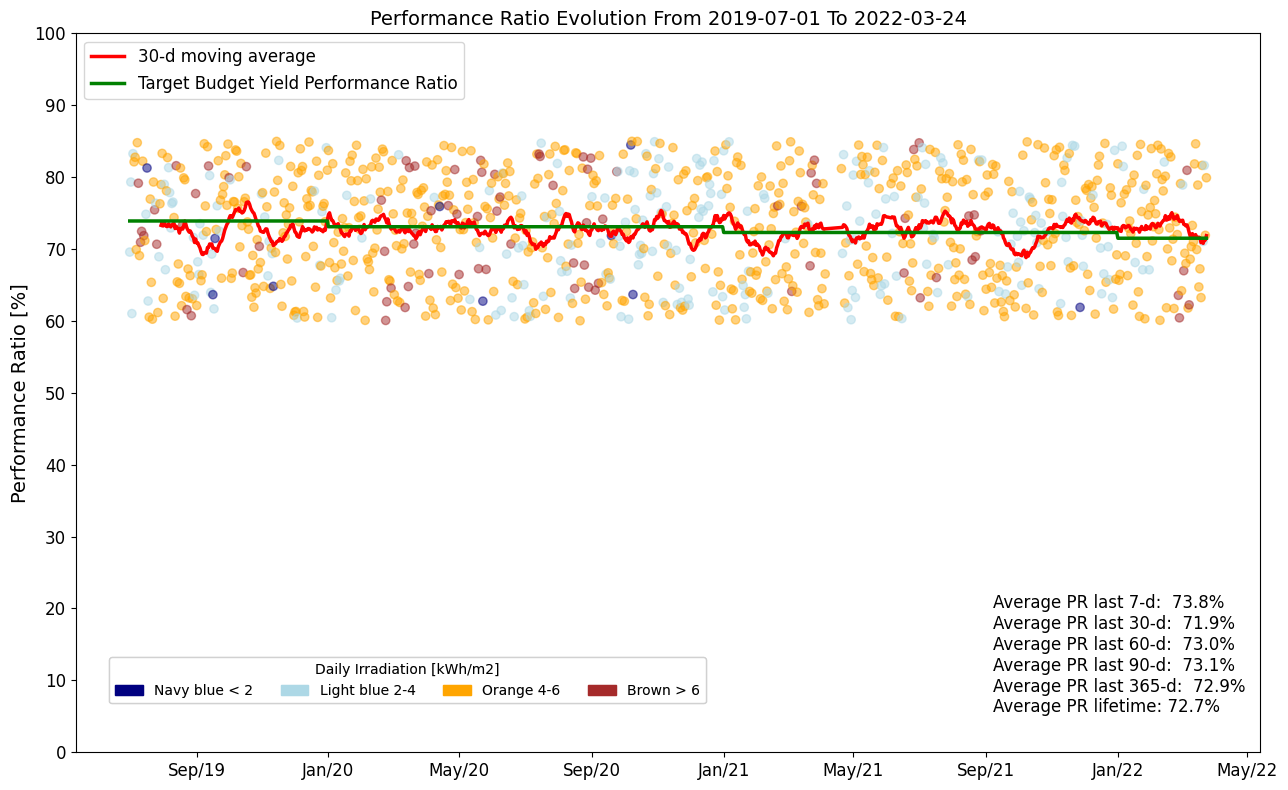

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from matplotlib.offsetbox import AnchoredText

# Read the dataset
df = pd.read_excel('C:/Users/harsh/Desktop/Assignment_Dataset.xlsx')

# Convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the 30-day moving average of PR
df['MA'] = df['PR'].rolling(30).mean()

# Calculate the budget line value
start_year = df['Date'].min().year
df['Budget'] = 73.9 - ((df['Date'].dt.year - start_year) * 0.8)

# Define a function to assign colors
def color(x):
    if x < 2:
        return 'navy'
    elif x < 4:
        return 'lightblue'
    elif x < 6:
        return 'orange'
    else:
        return 'brown'

# Apply the function to create a new column for colors
df['Color'] = df['GHI'].apply(color)

plt.figure(figsize = (13, 8))

# Create a scatter plot of PR vs Date with colors based on GHI
plt.scatter(df['Date'], df['PR'], c = df['Color'], alpha = 0.5)

# Plot the 30-day moving average of PR as a red line
red_line, = plt.plot(df['Date'], df['MA'], c = 'red', label = '30-d moving average of PR', linewidth = 2.5)

# Plot the budget line as a green line
green_line, = plt.plot(df['Date'], df['Budget'], c = 'green', label = 'Target Budget Yield Performance Ratio [1Y-73.9%,2Y-73.3%,3Y-72.7]', linewidth = 2.5)

# Add labels, title and legend
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b/%y'))

plt.ylabel('Performance Ratio [%]', fontsize = 14)
plt.title('Performance Ratio Evolution From 2019-07-01 To 2022-03-24', fontsize = 14)
plt.yticks(np.arange(0, 110, 10), fontsize = 12)
plt.xticks(fontsize = 12)
plt.ylim(0, 100)

# Create a custom legend for GHI conditions
legend_elements = [
    mpatches.Patch(color = 'navy', label = 'Navy blue < 2'),
    mpatches.Patch(color = 'lightblue', label = 'Light blue 2-4'),
    mpatches.Patch(color = 'orange', label = 'Orange 4-6'),
    mpatches.Patch(color = 'brown', label = 'Brown > 6')
]

legend_text = '\n'.join([f'{patch.get_label()}' for patch in legend_elements])
legend_text = 'Daily Irradiation [kWh/m2]\n' + legend_text

plt.legend(handles = legend_elements, title = 'Daily Irradiation [kWh/m2]', loc = 'center', bbox_to_anchor = (0.28, 0.1), ncol = 4, fontsize = 10)

# Display the rolling average periods one by one
rolling_periods = [7, 30, 60, 90, 365]
rolling_avg_legend = ''

for period in rolling_periods:
    rolling_avg = df['PR'].rolling(window = period).mean().iloc[-1]
    rolling_avg_legend += f'Average PR last {period}-d: {rolling_avg : .1f}%\n'

# Calculate the lifetime rolling average
lifetime_avg = df['PR'].mean()
rolling_avg_legend += f'Average PR lifetime:{lifetime_avg: .1f}%\n'

# Increase the font size of the anchored text
anchored_text = AnchoredText(rolling_avg_legend, loc = 'lower right', frameon = False, prop = {'size': 12})
plt.gca().add_artist(anchored_text)

# Create a legend for the red and green lines
line_legend = plt.legend([red_line, green_line], ['30-d moving average', 'Target Budget Yield Performance Ratio'], loc = 'upper left', fontsize = 12)

# Create a separate legend for the GHI conditions
ghi_legend = plt.legend(handles = legend_elements, title = 'Daily Irradiation [kWh/m2]', loc = 'center', bbox_to_anchor = (0.28, 0.1), ncol = 4, fontsize = 10)

# Add both legends to the plot
plt.gca().add_artist(line_legend)
plt.gca().add_artist(ghi_legend)

# Show the plot
plt.tight_layout()
plt.show()